In [4]:
%matplotlib inline
import geopandas as gpd
#import descartes
import matplotlib.pyplot as plt

In [5]:
pwd

'/Users/lirui/data-599-capstone-project-open-building/data-599-capstone-project-open-building/visualization/code'

In [6]:
# set the filepath and load in a shapefile
fp="/Users/lirui/Desktop/data_599/FourStats/BD_BCR_Prox_Size.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()


,CTUID,PRNAME,CMANAME,CMATYPE,area,SumBldgAre,BCR,BldgCount,BDensity,ProxMean,ProxSD,AvgSize,geometry
0,7050100.12,Saskatchewan,Regina,B,9.886176e+06,710689.652329,0.071887,3421,3.460400e-04,15.632272,7.689297,207.743248,"POLYGON ((5313856.75143 1677717.71143, 5313403..."
1,7050100.13,Saskatchewan,Regina,B,8.509538e+06,538801.877355,0.063317,2054,2.413800e-04,16.308027,10.085216,262.318343,"POLYGON ((5313190.09143 1678349.31143, 5313158..."
2,7050100.14,Saskatchewan,Regina,B,6.649859e+08,3509.555987,0.000005,13,2.000000e-08,20.151835,7.670498,269.965845,"POLYGON ((5317260.705715 1691091.03143, 531730..."
3,7050005.00,Saskatchewan,Regina,B,2.138134e+06,322800.447030,0.150973,3141,1.469040e-03,12.597635,5.610724,102.769961,"POLYGON ((5303740.34 1679038.68, 5303777.06285..."
4,7050006.00,Saskatchewan,Regina,B,1.273107e+07,676853.138049,0.053165,2442,1.918100e-04,18.528871,17.417214,277.171637,"POLYGON ((5305754.04857 1677692.21143, 5305760..."


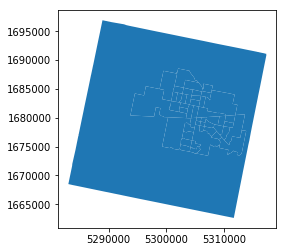

In [4]:
map_df.plot()

# Non-interactive visualization
## Building coverage ratio (BCR)

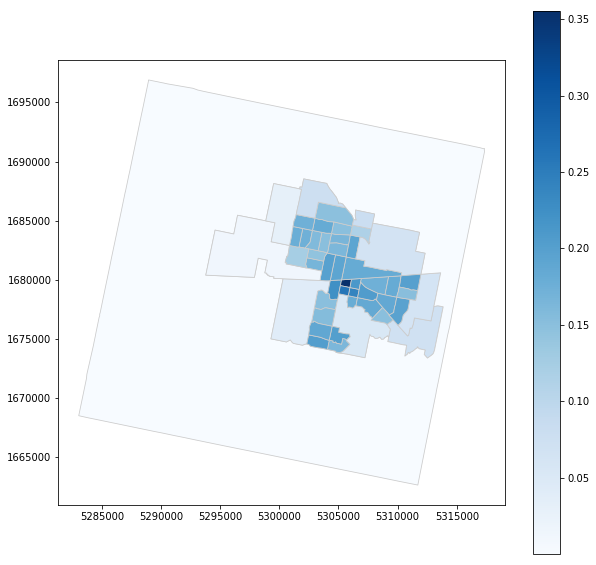

In [5]:
map_df.plot(figsize= (10, 10), column="BCR", cmap='Blues', linewidth=0.8,  edgecolor='0.8', legend=True)

## Building density (BD)

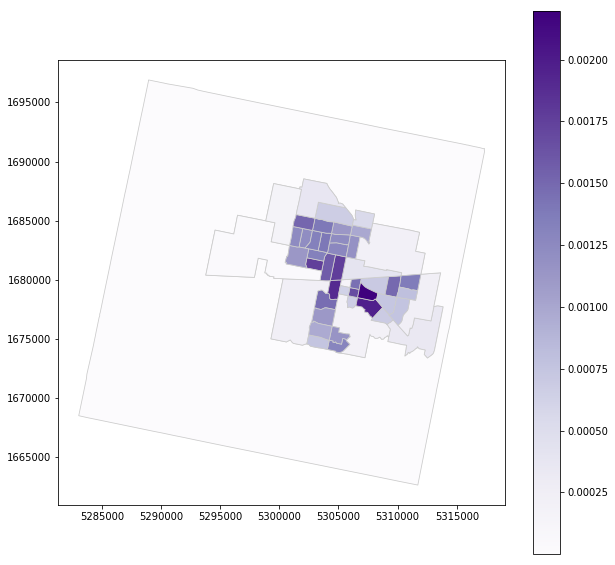

In [6]:
map_df.plot(figsize= (10, 10), column="BDensity", cmap='Purples', linewidth=0.8,  edgecolor='0.8', legend=True)

## Proximity

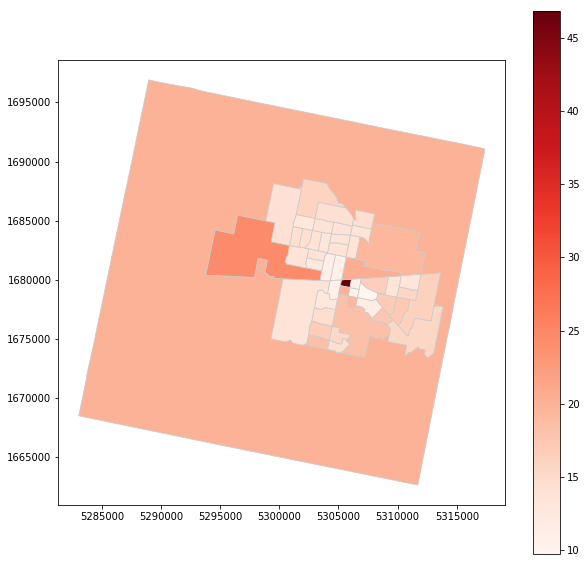

In [7]:
map_df.plot(figsize= (10, 10), column="ProxMean", cmap='Reds', linewidth=0.8,  edgecolor='0.8', legend=True)

## Size

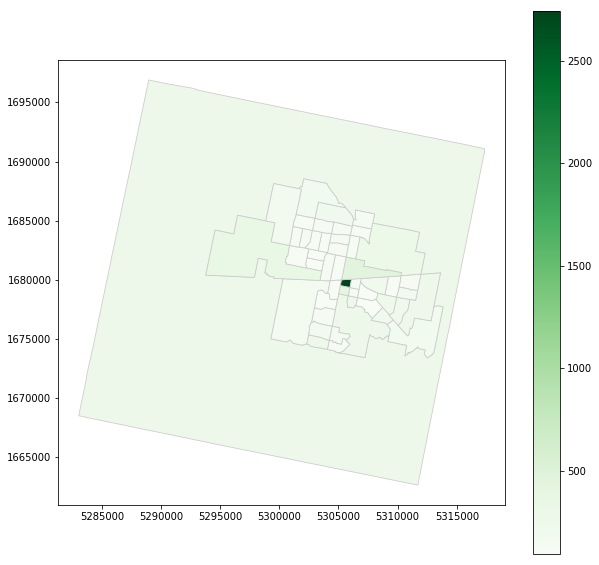

In [8]:
map_df.plot(figsize= (10, 10), column="AvgSize", cmap='Greens', linewidth=0.8,  edgecolor='0.8',legend=True)

# interactive dashboard

In [7]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
map_df.plot_bokeh(simplify_shapes=10)

Loading BokehJS ...

Figure(id='1004', ...)

## BCR

In [12]:
pandas_bokeh.output_file("Building Coverage Ratio.html")

In [13]:
map_df.plot_bokeh(
    figsize=(900, 600),
    category="BCR",
    show_colorbar=True,
    colormap="Viridis",
    legend="Census Tract",
    hovertool_columns=['CTUID','CMANAME','BCR'],
    title="Building coverage ratio (BCR)")

Figure(id='1446', ...)

## BDensity

In [14]:
pandas_bokeh.output_file("Building Density.html")

In [15]:
map_df.plot_bokeh(
    figsize=(900, 600),
    category="BDensity",
    show_colorbar=True,
    colormap="Blues",
    hovertool_columns=['CTUID','CMANAME','BDensity'],
    title="Building density (BD)")

Figure(id='1603', ...)

## Proximity

In [16]:
pandas_bokeh.output_file("Proximity.html")

In [17]:
map_df.plot_bokeh(
    figsize=(900, 600),
    category="ProxMean",
    show_colorbar=True,
    colormap="Purples",
    hovertool_columns=['CTUID','CMANAME','ProxMean'],
    title="Proximity")

Figure(id='1760', ...)

## Average Size

In [18]:
pandas_bokeh.output_file("size.html")

In [19]:
map_df.plot_bokeh(
    figsize=(900, 600),
    category="AvgSize",
    show_colorbar=True,
    colormap="Greens",
    hovertool_columns=['CTUID','CMANAME','AvgSize'],
    legend="Census Tract",
    toolbar_location="above",
    title="Size")

Figure(id='1917', ...)

# Dashboard

In [20]:
pandas_bokeh.output_file("Dashboard.html")

In [21]:
map_df.plot_bokeh(
    dropdown=["BCR","BDensity","ProxMean","AvgSize"],
    colormap="Viridis",
    figsize=(800, 800),
    show_colorbar=True,
    hovertool_string="""
                        <h3> CTUID@CTUID </h2>
                        <h4> Building Coverage Ratio: @BCR </h3>
                        <h4> Building Density: @BDensity </h3>
                        <h4> Proximity: @ProxMean </h3>
                        <h4> Size: @AvgSize </h3>""",
    #legend
    colormap_range=(min(map_df.BCR),max(map_df.BCR)),
    title="Size"
    )

Column(id='2149', ...)

In [125]:
from bokeh.models.widgets import Dropdown

#output_file("dropdown.html")

menu = [("BCR","BCR"),("BDensity","BDensity"),("ProxMean","ProxMean"),("AvgSize","AvgSize")]
dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)


In [107]:
#Import Pandas and Pandas-Bokeh (if you do not specify an output option, the standard is
#output_file):
import pandas as pd
import pandas_bokeh

#Create DataFrame to Plot:
import numpy as np
x = np.arange(-10, 10, 0.1)
sin = np.sin(x)
cos = np.cos(x)
tan = np.tan(x)
df = pd.DataFrame({"x": x, "sin(x)": sin, "cos(x)": cos, "tan(x)": tan})

#Make Bokeh plot from DataFrame using Pandas Bokeh. Do not show the plot, but export
#it to an embeddable HTML string:
html_plot = df.plot_bokeh(
    kind="line",
    x="x",
    y=["sin(x)", "cos(x)", "tan(x)"],
    xticks=range(-20, 20),
    title="Trigonometric functions",
    show_figure=False,
    return_html=True,
    ylim=(-1.5, 1.5))

#Write some HTML and embed the HTML plot below it. For production use, please use
#Templates and the awesome Jinja library.
html = r"""
<script type="text/x-mathjax-config">
  MathJax.Hub.Config({tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}});
</script>
<script type="text/javascript"
  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML">
</script>

<h1> Trigonometric functions </h1>

<p> The basic trigonometric functions are:</p>

<p>$ sin(x) $</p>
<p>$ cos(x) $</p>
<p>$ tan(x) = \frac{sin(x)}{cos(x)}$</p>

<p>Below is a plot that shows them</p>

""" + html_plot

#Export the HTML string to an external HTML file and show it:
with open("test.html" , "w") as f:
    f.write(html)
    
import webbrowser
webbrowser.open("test.html")

True